In [1]:
import pandas as pd 
import seaborn as sns 
import warnings
import numpy as np
import matplotlib.pyplot as plt 
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", header=None, index_col = None, sep=' ')
df.columns = names=['StaAcc', 'DuMon', 'CredHis', 'Purpose', 'CredAmt', 'SavAcc', \
                    'PreEmpl', 'InsRt', 'PerSta', 'OthDebtor', 'PreRe', 'Property', \
                    'Age', 'IntPla', 'Housing', 'ExstCredit', 'Job', 'NoMain', 'Phone', 'ForWorker', "Response"]
df.head(5)

,StaAcc,DuMon,CredHis,Purpose,CredAmt,SavAcc,PreEmpl,InsRt,PerSta,OthDebtor,...,Property,Age,IntPla,Housing,ExstCredit,Job,NoMain,Phone,ForWorker,Response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


<Axes: ylabel='count'>

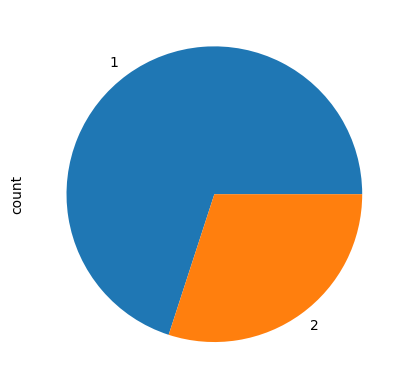

In [3]:
df['Response'].value_counts().plot.pie() # imbalanced-data (70-30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StaAcc      1000 non-null   object
 1   DuMon       1000 non-null   int64 
 2   CredHis     1000 non-null   object
 3   Purpose     1000 non-null   object
 4   CredAmt     1000 non-null   int64 
 5   SavAcc      1000 non-null   object
 6   PreEmpl     1000 non-null   object
 7   InsRt       1000 non-null   int64 
 8   PerSta      1000 non-null   object
 9   OthDebtor   1000 non-null   object
 10  PreRe       1000 non-null   int64 
 11  Property    1000 non-null   object
 12  Age         1000 non-null   int64 
 13  IntPla      1000 non-null   object
 14  Housing     1000 non-null   object
 15  ExstCredit  1000 non-null   int64 
 16  Job         1000 non-null   object
 17  NoMain      1000 non-null   int64 
 18  Phone       1000 non-null   object
 19  ForWorker   1000 non-null   object
 20  Response 

In [5]:
df.describe() # large diffencees between means of variables (1.155 -> 3271.258) => standardize data 

,DuMon,CredAmt,InsRt,PreRe,Age,ExstCredit,NoMain,Response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [6]:
df.isnull().sum().sum() # none null value in dataset 

np.int64(0)

In [7]:
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
object_cols = df.select_dtypes(include='object').columns
numeric_cols, object_cols

(Index(['DuMon', 'CredAmt', 'InsRt', 'PreRe', 'Age', 'ExstCredit', 'NoMain',
        'Response'],
       dtype='object'),
 Index(['StaAcc', 'CredHis', 'Purpose', 'SavAcc', 'PreEmpl', 'PerSta',
        'OthDebtor', 'Property', 'IntPla', 'Housing', 'Job', 'Phone',
        'ForWorker'],
       dtype='object'))

### Distributions for numerical variables
Based on distribution, give acess about distribution of variables. And with business experience, are these distributions realistic? Check with history distributions of data, if there is something wrong with data 

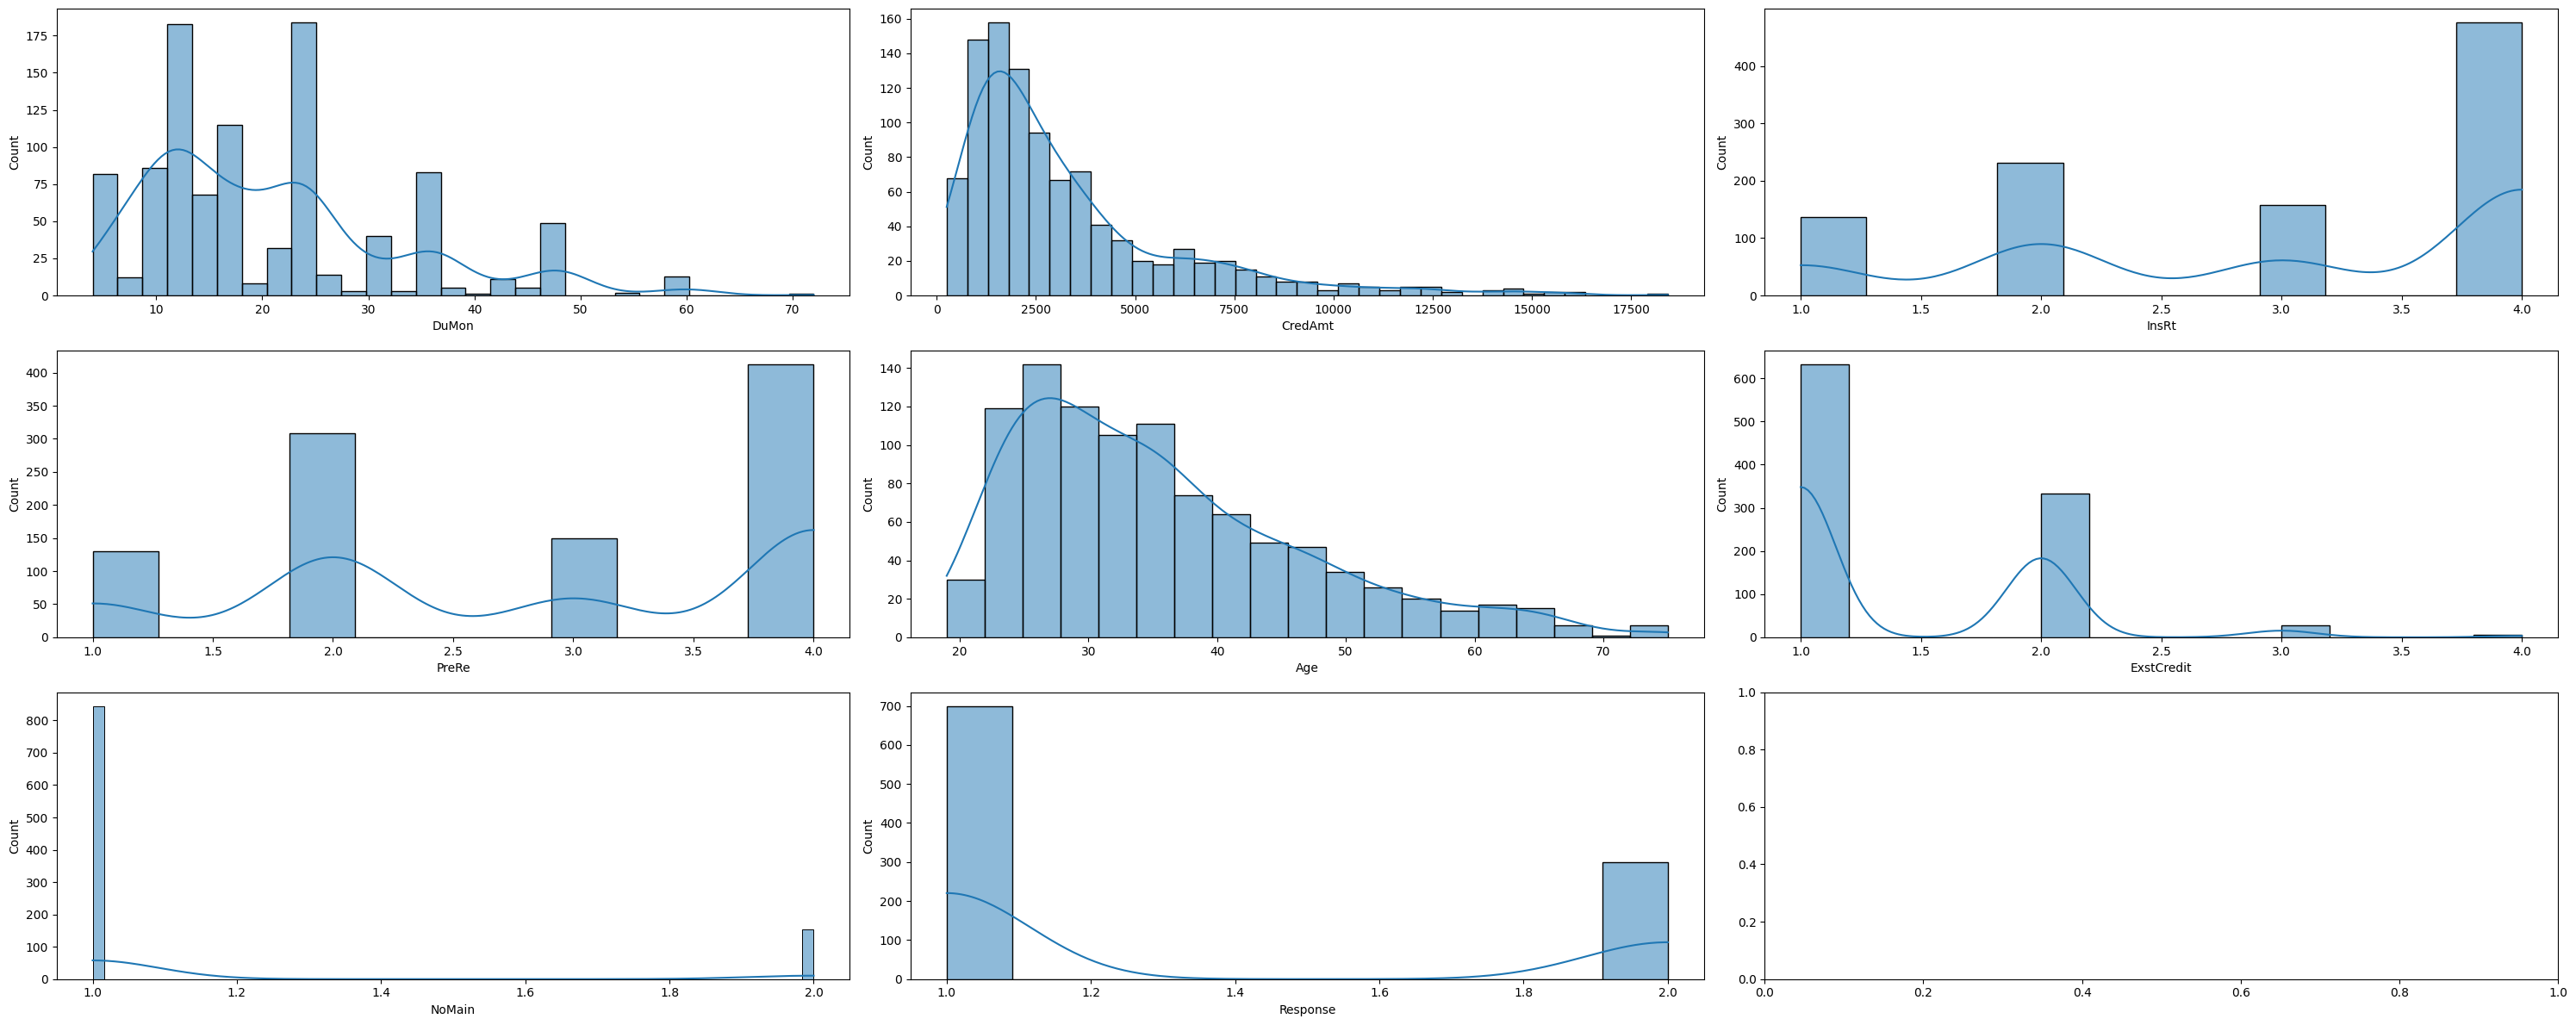

In [8]:
colCount = 3
rowCount = (len(numeric_cols) + colCount -1) // colCount
fig, ax = plt.subplots(rowCount, colCount, figsize=(30,12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

ax = ax.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=ax[i], kde=True)
    

plt.tight_layout()
plt.show()

### Category colums
Ta nhận thấy có nhiều nhãn trong biến phân loại có số lượng quan sát rất ít. Theo kinh nghiệm thì các nhãn thiểu số lại có thể là đặc trưng riêng của một nhãn đầu ra. Vì thế chúng ta có thể khảo sát thêm tỷ lệ giữa GOOD/BAD cách biệt như thế nào ở những nhãn này. Kết quả đánh giá chúng có thể giúp ta đưa ra một số kết luận hữu ích đối với phân loại nhãn.

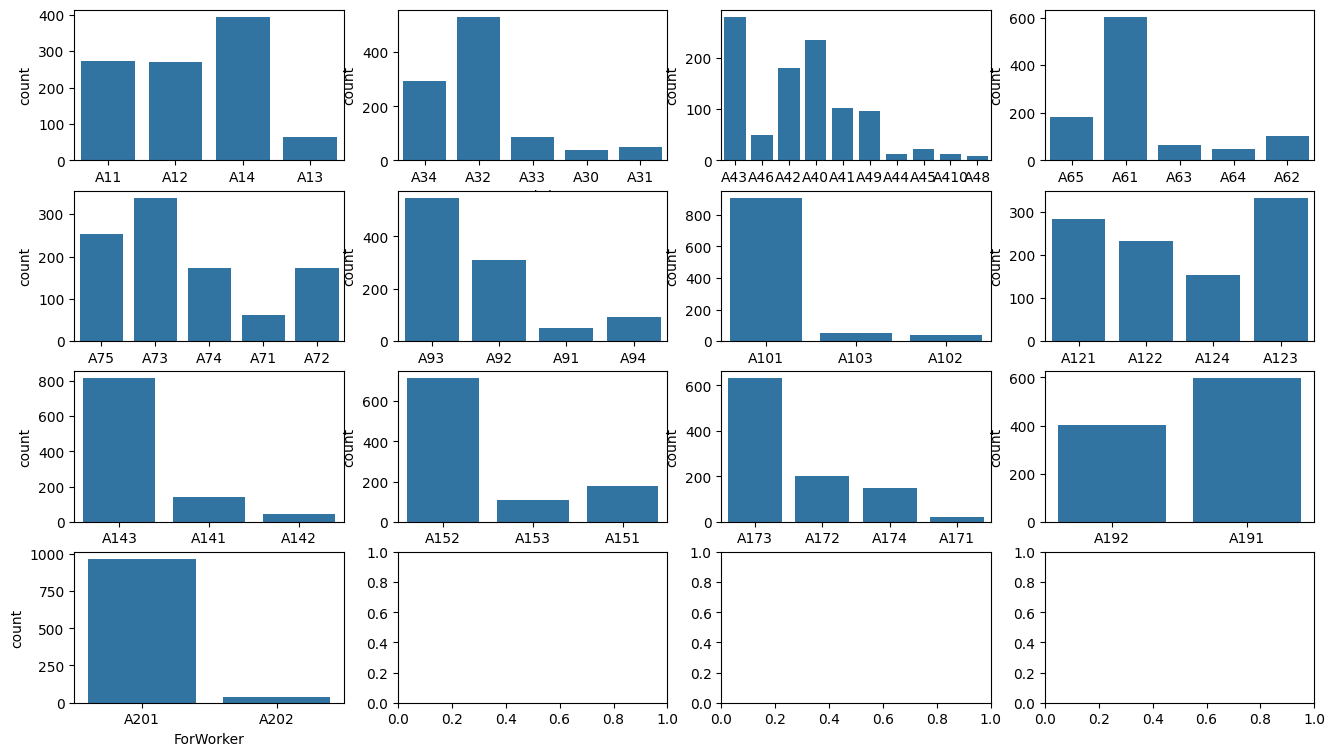

In [9]:
colCount = 4
rowCount = (len(object_cols) + colCount -1) // colCount 
fig, ax = plt.subplots(rowCount, colCount, figsize=(16,9))
ax = ax.flatten()

for i, col in enumerate(object_cols):
    sns.countplot(data=df, x=col, ax=ax[i]) # , hue=df["Response"]

In [10]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y) # stratify ensure the same ratio between Y/N in the dependent variable  

### Preprocessing model
1. OneHotEncoder: transform categorical data into numerical binary vector
2. SimpleImputer: process missing data
3. MixMaxScaler, StandardScaler: standardize data
    - StandardScaler: 
        - pos: Remove impact of outliers without removing them
        - neg: Is sensitive to outliers (extreme values can skew meand and s) -> not rec for non-normal dist
    - MixMaxScaler: 
        - pos: easy to intepret
        - nge: sensitive to outliers and fixed range limits flexibility for datasets with changing scales 
4. RobustScaler: reduce the impact of outliers by scaling data and IQR
    - pos: 
        - resistant with outliers
        - maintains the structure of data 
    - neg: 
        - not perform well when data is highly skwewed 

In [12]:
cat_names = list(X_train.select_dtypes(include=['object']).columns)
num_names = list(X_train.select_dtypes(include=['int']).columns)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler


cat_pl = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

num_pl = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=7)),
    ('onehot', RobustScaler())
])

preprocessor  = ColumnTransformer(transformers=[
    ('cat',cat_pl, cat_names),
    ('num',num_pl, num_names)
])


completed_pl = Pipeline(steps=[
    ('preprocessor ', preprocessor ),
    ('model', RandomForestClassifier())
])

completed_pl.fit(X_train, y_train)

,steps,"[('preprocessor ', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [14]:
from sklearn.metrics import accuracy_score

y_train_pred = completed_pl.predict(X_train)
y_test_pred = completed_pl.predict(X_test)


In [15]:
accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)


(1.0, 0.74)

In [16]:
from sklearn.metrics import classification_report


print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       560
           2       1.00      1.00      1.00       240

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

              precision    recall  f1-score   support

           1       0.76      0.91      0.83       140
           2       0.62      0.33      0.43        60

    accuracy                           0.74       200
   macro avg       0.69      0.62      0.63       200
weighted avg       0.72      0.74      0.71       200



### Cross validation 

In [17]:
from sklearn.metrics import fbeta_score

# trung phat sai Tức là một trường hợp False Negative có mức độ sai lầm bằng 5 trường hợp False Positive beta^2 = 5 => beta = np.sqrt(5)
def fbeta(y_true, y_pred): 
    return fbeta_score(y_true, y_pred, beta=np.sqrt(5))

In [18]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
metric = make_scorer(fbeta)
scores = cross_val_score(completed_pl, X=X_train, y=y_train, cv=cv, scoring=metric)

In [19]:
print(scores.mean())

0.8993282154952682


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


models = [GaussianNB(), LogisticRegression(), KNeighborsClassifier(), MLPClassifier(), RandomForestClassifier()]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
metric = make_scorer(fbeta)

In [22]:
all_scores = []

warnings.filterwarnings('ignore')
for model in models: 
    completed_pl = Pipeline(steps=[
        ('preprocessor ', preprocessor ),
        ('model', model)
    ])

    completed_pl.fit(X_train, y_train)
    scores = cross_val_score(completed_pl, X=X_train, y=y_train, cv=cv, scoring=metric)
    all_scores.append(scores)
